# Machine Learning Application to Venomics

# Data Preprocessing

In [ ]:
#%tensorflow_version 2.x 

UsageError: Line magic function `%tensorflow_version` not found.


In [3]:
print("Importing libraries...")

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Embedding
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from keras.preprocessing import image
from keras.utils import pad_sequences
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, ConfusionMatrixDisplay, hamming_loss, classification_report
import numpy as np
from numpy import savetxt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axis import Axis
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.layers import BatchNormalization
import sklearn.metrics as skm


print("Libraries imported!")

Importing libraries...


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# Import dataset

path='py_venomics_dataset.xlsx'
df = pd.read_excel(path)
df = df.drop(["Molecular Function"], axis=1)

In [57]:
# Creating the amino acid encoding dictionary and encoding function

codes = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L',
         'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

def create_dict(codes):
  char_dict = {}
  for index, val in enumerate(codes):
    char_dict[val] = index+1

  return char_dict

char_dict = create_dict(codes)

def integer_encoding(data):
  encode_list = []
  for row in data['Sequence'].values:
    row_encode = []
    for code in row:
      row_encode.append(char_dict.get(code, 0))
    encode_list.append(np.array(row_encode))

  return encode_list

def test_encode(sequ):
  ret_list = []
  encoded_list= []
  for code in sequ:
    encoded_list.append(char_dict.get(code, 0))
  ret_list.append(encoded_list)
  ret_list = pad_sequences(ret_list, maxlen=max_length, padding='post', truncating='post')
  return ret_list

In [58]:
# Padding amino acid sequences to 600 character length / truncating at 600

df_encode = integer_encoding(df)
max_length = 600
df_pad = pad_sequences(df_encode, maxlen=max_length, padding='post', truncating='post')


In [59]:
# Dropping original sequence column and replacing with padded sequences
# Converting all columns to float32 to be used in neural network

df = df.drop(['Sequence', 'GO:0005516.1'], axis=1)
df = df.astype(np.float32)
df_pad = pd.DataFrame(df_pad)
result = pd.concat([df_pad, df], axis=1)

In [26]:
# Split dataset into X(amino acid sequences) and Y(molecular function categories)

x = result.drop(['GO:0090729', 'GO:0005179', 'GO:0016829',
       'GO:0046872', 'GO:0008081', 'GO:0004867', 'GO:0099106', 'GO:0015459',
       'GO:0004252', 'GO:0005246', 'GO:0004623', 'GO:0005509', 'GO:0008200',
       'GO:0017080', 'GO:0019834', 'GO:0008270', 'GO:0030550', 'GO:0004222',
       'GO:0052740', 'GO:0052739', 'GO:0008970', 'GO:0050025', 'GO:0050029',
       'GO:0106329', 'GO:0008191', 'GO:0004620', 'GO:0008233', 'GO:0016504',
       'GO:0060422', 'GO:0000166', 'GO:0106411', 'GO:0000287', 'GO:0008237',
       'GO:0005102', 'GO:0005216', 'GO:0008201', 'GO:0008236', 'GO:0008289',
       'GO:0019870', 'GO:0019871', 'GO:0004465', 'GO:0016491', 'GO:0042802',
       'GO:0047498', 'GO:0048018', 'GO:0001515', 'GO:0001716', 'GO:0042803',
       'GO:0003677', 'GO:0050660', 'GO:0003990', 'GO:0003993', 'GO:0004175',
       'GO:0004177', 'GO:0004415', 'GO:0008239', 'GO:0004556', 'GO:0004860',
       'GO:0004866', 'GO:0004869', 'GO:0005154', 'GO:0005184', 'GO:0005185',
       'GO:0005507', 'GO:0005516', 'GO:0005520', 'GO:0005534', 'GO:0030395',
       'GO:0033296', 'GO:0008061', 'GO:0008083', 'GO:0016603', 'GO:0016787',
       'GO:0019855', 'GO:0003676', 'GO:0016853', 'GO:0017081', 'GO:0044325',
       'GO:0030246', 'GO:0030414', 'GO:0033906', 'GO:0043262', 'GO:0048019',
       'GO:0070320', 'GO:0080030', 'GO:0140628'], axis=1)

y = df.drop(['Length','Mass'], axis=1)

# Model Building

In [60]:
# X Y traing/test split
x_train, x_test, y_train, y_test = train_test_split(x.drop(['Length', 'Mass'], axis=1), y, random_state=10, test_size=0.25)

In [64]:
# Model architecture construction
model = Sequential()

model.add(Embedding(10000, 32, input_length=600))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(86, activation='sigmoid'))


/Users/ameyak/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [65]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Fit and train model
fitted = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), batch_size=16)

Epoch 1/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.5637 - loss: 0.2425 - val_accuracy: 0.9000 - val_loss: 0.0529
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.8943 - loss: 0.0633 - val_accuracy: 0.8910 - val_loss: 0.0497
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.8964 - loss: 0.0554 - val_accuracy: 0.8830 - val_loss: 0.0452
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.8748 - loss: 0.0526 - val_accuracy: 0.8225 - val_loss: 0.0406
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.8430 - loss: 0.0472 - val_accuracy: 0.8257 - val_loss: 0.0400
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.8479 - loss: 0.0444 - val_accuracy: 0.8295 - val_loss: 0.0379
Epoch 7/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.8270 - loss: 0.0417 - val_accuracy: 0.8267 - val_loss: 0.0390
Epoch 8/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.8390 - loss: 0.0410 - 

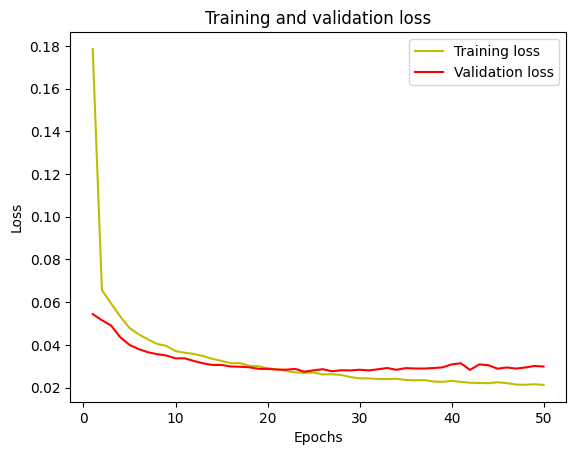

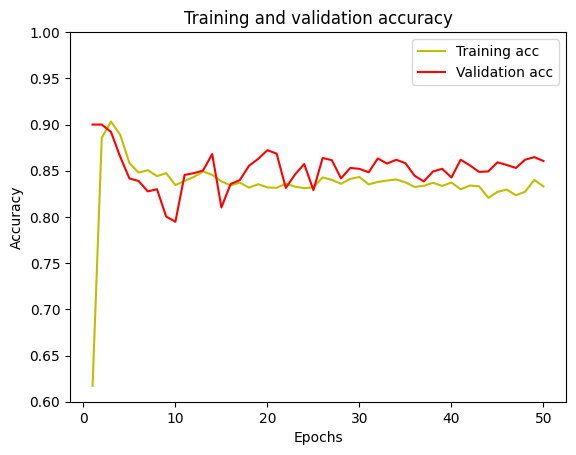

In [43]:
#plot the training and validation accuracy and loss at each epoch
loss = fitted.history['loss']
val_loss = fitted.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = fitted.history['accuracy']
val_acc = fitted.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(0.6,1)
plt.show()

In [ ]:
# Save Model


#model.save("models/model.h5")


# Data Analysis

In [ ]:
# Create Y prediction dataset from model predictions and collecting Y true values from original dataset
y_pred = model.predict(x_test)

y_pred = np.round(y_pred)
y_true = np.array(y_test)


In [ ]:
# Confusion matrix creation
mlconf = multilabel_confusion_matrix(y_true, y_pred)
hamloss = hamming_loss(y_true,y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=mlconf[0])
# print(mlconf)
disp.plot()
plt.show()

label_names = ['GO:0090729', 'GO:0005179', 'GO:0016829',
       'GO:0046872', 'GO:0008081', 'GO:0004867', 'GO:0099106', 'GO:0015459',
       'GO:0004252', 'GO:0005246', 'GO:0004623', 'GO:0005509', 'GO:0008200',
       'GO:0017080', 'GO:0019834', 'GO:0008270', 'GO:0030550', 'GO:0004222',
       'GO:0052740', 'GO:0052739', 'GO:0008970', 'GO:0050025', 'GO:0050029',
       'GO:0106329', 'GO:0008191', 'GO:0004620', 'GO:0008233', 'GO:0016504',
       'GO:0060422', 'GO:0000166', 'GO:0106411', 'GO:0000287', 'GO:0008237',
       'GO:0005102', 'GO:0005216', 'GO:0008201', 'GO:0008236', 'GO:0008289',
       'GO:0019870', 'GO:0019871', 'GO:0004465', 'GO:0016491', 'GO:0042802',
       'GO:0047498', 'GO:0048018', 'GO:0001515', 'GO:0001716', 'GO:0042803',
       'GO:0003677', 'GO:0050660', 'GO:0003990', 'GO:0003993', 'GO:0004175',
       'GO:0004177', 'GO:0004415', 'GO:0008239', 'GO:0004556', 'GO:0004860',
       'GO:0004866', 'GO:0004869', 'GO:0005154', 'GO:0005184', 'GO:0005185',
       'GO:0005507', 'GO:0005516', 'GO:0005520', 'GO:0005534', 'GO:0030395',
       'GO:0033296', 'GO:0008061', 'GO:0008083', 'GO:0016603', 'GO:0016787',
       'GO:0019855', 'GO:0003676', 'GO:0016853', 'GO:0017081', 'GO:0044325',
       'GO:0030246', 'GO:0030414', 'GO:0033906', 'GO:0043262', 'GO:0048019',
       'GO:0070320', 'GO:0080030', 'GO:0140628']


# Classification report, returns precision, recall, F1 score for each class
print(classification_report(y_true, y_pred,target_names=label_names, zero_division=0))

MODEL OUTPUT

In [ ]:
# Encode inputted sequence
classes = np.array(df.columns[3:])
test_sequence = test_encode('MVSRYVPDMGDLIWVDFDPTKGSEQAGHRPAVVLSPFMYNNKTGMCLCVPCTTQSKGYPFEVVLSGQERDGVALADQVKSIAWRARGATKKGTVAPEELQLIKAKINVLIG')

# Predict molecular function classes and get top 10
proba = model.predict(test_sequence)
sorted_categories = np.argsort(proba[0])[:-11:-1]


# Output
for i in range(10):
    print("{}".format(classes[sorted_categories[i]])+" ({:.3})".format(proba[0][sorted_categories[i]]))

# Saved Model Testing



In [ ]:
# Importing saved HDF5 file of the model
nmodel = tf.keras.models.load_model('/content/drive/MyDrive/ML Models/venomics.hdf5')

In [ ]:
# Testing to ensure saved model has same accuracy
nmodel.evaluate(x_test, y_test)

67/67 [==============================] - 2s 3ms/step - loss: 0.0044 - accuracy: 0.9671


[0.004387811291962862, 0.9671207070350647]

**MODEL OUTPUT**

In [ ]:
# Encode inputted sequence
classes = np.array(df.columns[3:])
seq = 'MNFKYSILFICFGTLDRGLIPECPFNEYDILFFVYTRQQRDGIVLTEETLQNYDLFKKSTISRQVVFIDHGFLSNGNNENFIAMAKALIEKDNFLVISVDWKKGACNAFASTLDYLGYSTAVGNTRHVGKYVADFTKLLVEQYKVSMSNIRLIGHSLGAHTSGFAGKEVQELKLNKYSNIDGLDPAGPSFDSNDCPERLCETDAEYVQIIHTSNILGVYSKIGTVDFYMNYGSHQPGCGRFFSPSCSHTKAVKYLTECIKHECCLIGTPWKKYFSTPKPISQCTKDTCVCVGLNAKSYPARGSFYVPVEATAPYCHNEGIKL'
test_sequence = test_encode(seq)

# Predict molecular function classes and get top 10
proba = nmodel.predict(test_sequence)
sorted_categories = np.argsort(proba[0])[:-11:-1]

# Output
print()
print("Amino Acid Sequence: "+seq[0:20]+"...")
print()
print("Predicted Molecular Functions: ")
for i in range(10):
    print("{}".format(classes[sorted_categories[i]])+" ({:.3})".format(proba[0][sorted_categories[i]]))

1/1 [==============================] - 0s 24ms/step

Amino Acid Sequence: MNFKYSILFICFGTLDRGLI...

Predicted Molecular Functions: 
GO:0052740 (0.985)
GO:0008970 (0.985)
GO:0052739 (0.985)
GO:0090729 (0.118)
GO:0004623 (0.0722)
GO:0005509 (0.00246)
GO:0004415 (0.00145)
GO:0008201 (0.000674)
GO:0042802 (0.000143)
GO:0003677 (0.000128)


**Extra Data Analysis and Testing**

In [ ]:
y_pred = nmodel.predict(x_test)

y_pred = np.round(y_pred)
y_true = np.array(y_test)


67/67 [==============================] - 3s 2ms/step


[[[ 435   17]
  [  16 1661]]

 [[2095    1]
  [   2   31]]

 [[2080    0]
  [   0   49]]

 [[1960    1]
  [   8  160]]

 [[2080    1]
  [   0   48]]

 [[2054    0]
  [   1   74]]

 [[1928    3]
  [   9  189]]

 [[1949    2]
  [  13  165]]

 [[2084    0]
  [   2   43]]

 [[2052    1]
  [   8   68]]

 [[1997    1]
  [   1  130]]

 [[2008    0]
  [   2  119]]

 [[1904    3]
  [   4  218]]

 [[2039    1]
  [   4   85]]

 [[2127    0]
  [   2    0]]

 [[2121    0]
  [   3    5]]

 [[1985    3]
  [   3  138]]

 [[2087    0]
  [   2   40]]

 [[2121    0]
  [   0    8]]

 [[2121    0]
  [   0    8]]

 [[2121    0]
  [   0    8]]

 [[2129    0]
  [   0    0]]

 [[2129    0]
  [   0    0]]

 [[2121    0]
  [   8    0]]

 [[2112    0]
  [   3   14]]

 [[2129    0]
  [   0    0]]

 [[2127    0]
  [   2    0]]

 [[2117    0]
  [   7    5]]

 [[2128    0]
  [   1    0]]

 [[2126    0]
  [   3    0]]

 [[2127    0]
  [   2    0]]

 [[2129    0]
  [   0    0]]

 [[2116    0]
  [   2   11]]

 [[2127   

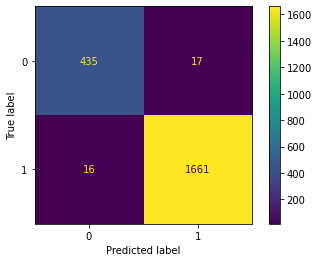

              precision    recall  f1-score   support

  GO:0090729       0.99      0.99      0.99      1677
  GO:0005179       0.97      0.94      0.95        33
  GO:0016829       1.00      1.00      1.00        49
  GO:0046872       0.99      0.95      0.97       168
  GO:0008081       0.98      1.00      0.99        48
  GO:0004867       1.00      0.99      0.99        75
  GO:0099106       0.98      0.95      0.97       198
  GO:0015459       0.99      0.93      0.96       178
  GO:0004252       1.00      0.96      0.98        45
  GO:0005246       0.99      0.89      0.94        76
  GO:0004623       0.99      0.99      0.99       131
  GO:0005509       1.00      0.98      0.99       121
  GO:0008200       0.99      0.98      0.98       222
  GO:0017080       0.99      0.96      0.97        89
  GO:0019834       0.00      0.00      0.00         2
  GO:0008270       1.00      0.62      0.77         8
  GO:0030550       0.98      0.98      0.98       141
  GO:0004222       1.00    

In [ ]:
mlconf = multilabel_confusion_matrix(y_true, y_pred)
hamloss = hamming_loss(y_true,y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=mlconf[0])
print(mlconf)
disp.plot()
plt.show()


label_names = ['GO:0090729', 'GO:0005179', 'GO:0016829',
       'GO:0046872', 'GO:0008081', 'GO:0004867', 'GO:0099106', 'GO:0015459',
       'GO:0004252', 'GO:0005246', 'GO:0004623', 'GO:0005509', 'GO:0008200',
       'GO:0017080', 'GO:0019834', 'GO:0008270', 'GO:0030550', 'GO:0004222',
       'GO:0052740', 'GO:0052739', 'GO:0008970', 'GO:0050025', 'GO:0050029',
       'GO:0106329', 'GO:0008191', 'GO:0004620', 'GO:0008233', 'GO:0016504',
       'GO:0060422', 'GO:0000166', 'GO:0106411', 'GO:0000287', 'GO:0008237',
       'GO:0005102', 'GO:0005216', 'GO:0008201', 'GO:0008236', 'GO:0008289',
       'GO:0019870', 'GO:0019871', 'GO:0004465', 'GO:0016491', 'GO:0042802',
       'GO:0047498', 'GO:0048018', 'GO:0001515', 'GO:0001716', 'GO:0042803',
       'GO:0003677', 'GO:0050660', 'GO:0003990', 'GO:0003993', 'GO:0004175',
       'GO:0004177', 'GO:0004415', 'GO:0008239', 'GO:0004556', 'GO:0004860',
       'GO:0004866', 'GO:0004869', 'GO:0005154', 'GO:0005184', 'GO:0005185',
       'GO:0005507', 'GO:0005516', 'GO:0005520', 'GO:0005534', 'GO:0030395',
       'GO:0033296', 'GO:0008061', 'GO:0008083', 'GO:0016603', 'GO:0016787',
       'GO:0019855', 'GO:0003676', 'GO:0016853', 'GO:0017081', 'GO:0044325',
       'GO:0030246', 'GO:0030414', 'GO:0033906', 'GO:0043262', 'GO:0048019',
       'GO:0070320', 'GO:0080030', 'GO:0140628']

print(classification_report(y_true, y_pred,target_names=label_names, zero_division=0))